In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [2]:
beer = pd.read_csv('beers.csv')
#beer.head()

In [3]:
beer = beer.rename(columns = {'name': 'beer'})
#beer.head()

In [4]:
brew = pd.read_csv('breweries.csv')
#brew.head()

In [5]:
brew = brew.rename(columns = {'name': 'brewery'})
#brew.head()

In [6]:
# merge datasets
brew['brewery_id'] = brew.index
beer_brew = pd.merge(beer, brew, on = 'brewery_id')
#beer_brew.head()

In [7]:
# drop unneeded columns
beer_brew = beer_brew.drop(['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1)
#beer_brew.head()

In [8]:
beer_brew.describe() # statistical report

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


In [9]:
beer_brew.info() # review data information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 10 columns):
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
beer          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
brewery       2410 non-null object
city          2410 non-null object
state         2410 non-null object
dtypes: float64(3), int64(2), object(5)
memory usage: 207.1+ KB


In [10]:
beer_brew.isnull().sum() # sum of nulls in each column

abv             62
ibu           1005
id               0
beer             0
style            5
brewery_id       0
ounces           0
brewery          0
city             0
state            0
dtype: int64

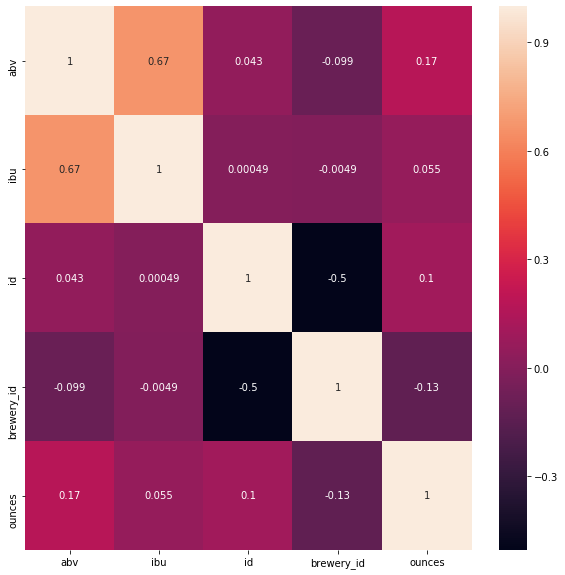

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(beer_brew.corr(), annot = True) # plot correlation to show the relationship between the variables

In [12]:
# Number of breweries
beer_brew['brewery'].value_counts()

Brewery Vivant                   62
Oskar Blues Brewery              46
Sun King Brewing Company         38
Cigar City Brewing Company       25
Sixpoint Craft Ales              24
                                 ..
Borderlands Brewing Company       1
Indiana City Brewing              1
Thomas Hooker Brewing Company     1
Dirty Bucket Brewing Company      1
Engine House 9                    1
Name: brewery, Length: 551, dtype: int64

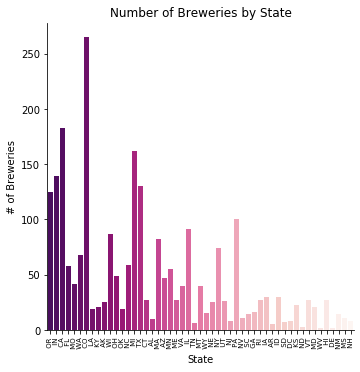

In [13]:
# Plot the number of breweries in each state
sns.catplot(x='state', kind='count', palette='RdPu_r', data=beer_brew)
plt.xlabel("State", size=10)
plt.ylabel("# of Breweries", size=10)
plt.title('Number of Breweries by State', size=12)
plt.xticks(rotation=90, fontsize = 7)
plt.show()

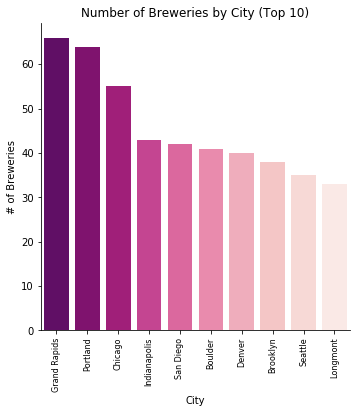

In [14]:
# top 10 cities with breweries
sns.catplot(x='city', kind='count', palette='RdPu_r', data=beer_brew,
            order=pd.value_counts(beer_brew['city']).iloc[:10].index)
plt.xlabel("City", size=10)
plt.ylabel("# of Breweries", size=10)
plt.title('Number of Breweries by City (Top 10)', size=12)
plt.xticks(rotation=90, fontsize = 8)
plt.show()

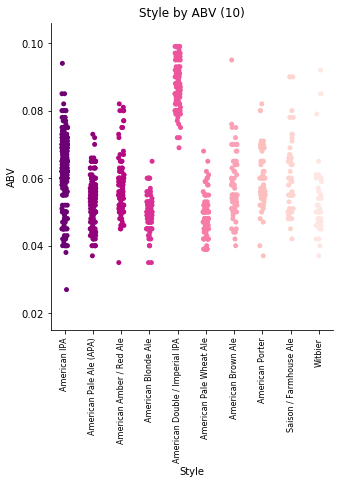

In [15]:
# Plot the styles of beer per ABV
sns.catplot(x='style', y='abv', palette='RdPu_r', data=beer_brew,
           order=pd.value_counts(beer_brew['style']).iloc[:10].index)
plt.xlabel("Style", size=10)
plt.ylabel("ABV", size=10)
plt.title('Style by ABV (10)', size=12)
plt.xticks(rotation=90, fontsize = 8)
plt.show()

In [16]:
# List of the most common styles
beer_brew['style'].value_counts()[:15]

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Fruit / Vegetable Beer             49
Kölsch                             42
Hefeweizen                         40
American Pale Lager                39
American Stout                     39
Name: style, dtype: int64

Text(0.5, 1.0, 'Most Common Beer Styles')

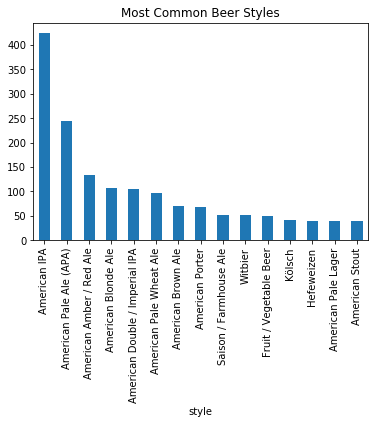

In [17]:
# Plot the most brewed styles
beer.groupby('style')['beer'].count().nlargest(15).plot(kind='bar',
               title='Most Brewed Beer Styles')

beer['style'].value_counts()[:15].plot(kind = "bar")
plt.title("Most Common Beer Styles")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016DC450EC08>,
      dtype=object)

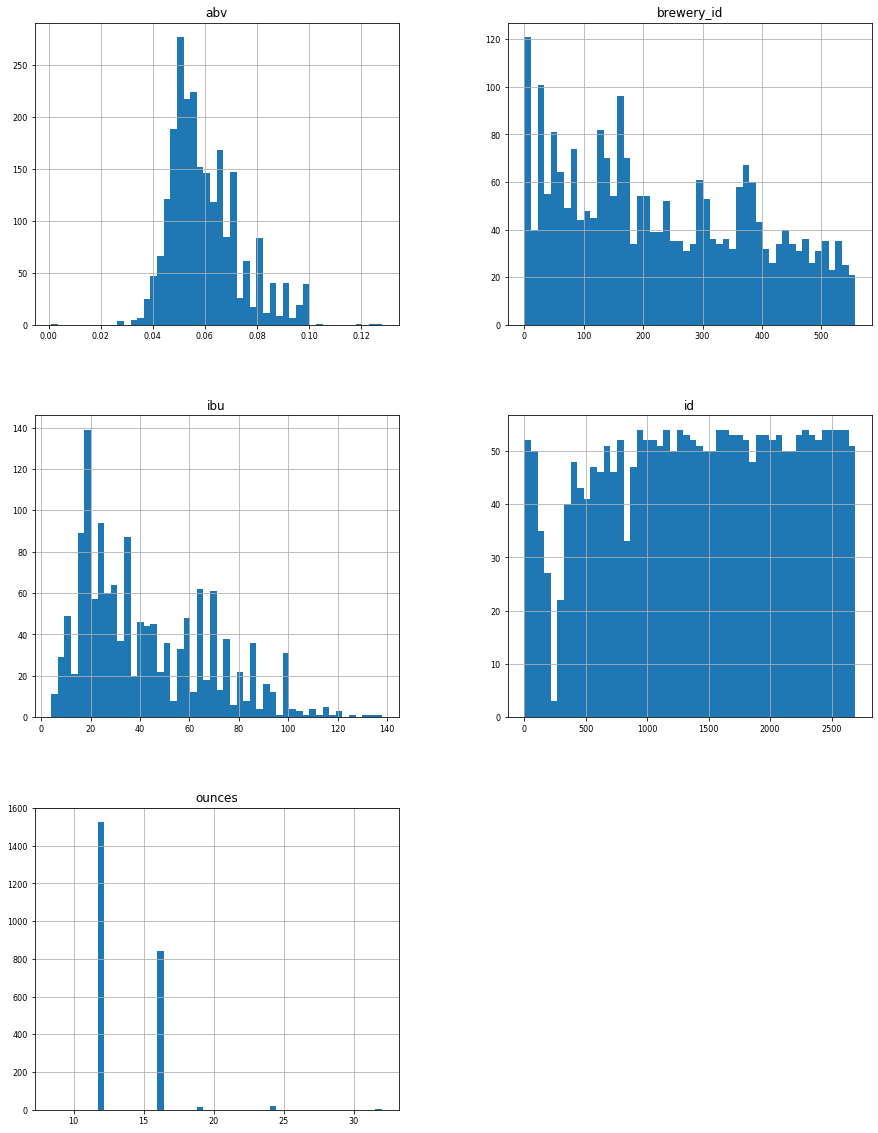

In [18]:
beer_brew.hist(figsize = (15,20), bins = 50, xlabelsize = 8, ylabelsize = 8)

In [19]:
# Models
gnbmodel = GaussianNB()
lrmodel = LogisticRegression()

In [20]:
# set up style as the target variable
target = pd.get_dummies(beer_brew.drop('style', axis=1)) # change the target variable 'style' from categorical to numerical
target = target.fillna(value = 0) # fill na values with 0

beer_brew['stylecode'] = beer_brew['style'].astype('category').cat.codes # create new column for style and assign numerical code

In [21]:
# set up state as the target variable
target_state = pd.get_dummies(beer_brew.drop('state', axis=1)) # change the target variable 'state' from categorical to numerical
target_state = target_state.fillna(value = 0) # fill na values with 0

beer_brew['statecode'] = beer_brew['state'].astype('category').cat.codes # create new column for state and assign numerical code

In [22]:
beer_brew.head()

,abv,ibu,id,beer,style,brewery_id,ounces,brewery,city,state,stylecode,statecode
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR,17,37
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN,16,15
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN,13,15
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN,10,15
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN,13,15


In [23]:
beer_brew.describe()

,abv,ibu,id,brewery_id,ounces,stylecode,statecode
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241,31.549793,23.026141
std,0.013542,25.954066,752.459975,157.685604,2.352204,28.700603,14.921037
min,0.001000,4.000000,1.000000,0.000000,8.400000,-1.000000,0.000000
25%,0.050000,21.000000,808.250000,93.000000,12.000000,13.000000,9.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000,16.000000,22.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000,55.000000,37.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000,98.000000,50.000000


In [24]:
beer_brew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2410 entries, 0 to 2409
Data columns (total 12 columns):
abv           2348 non-null float64
ibu           1405 non-null float64
id            2410 non-null int64
beer          2410 non-null object
style         2405 non-null object
brewery_id    2410 non-null int64
ounces        2410 non-null float64
brewery       2410 non-null object
city          2410 non-null object
state         2410 non-null object
stylecode     2410 non-null int8
statecode     2410 non-null int8
dtypes: float64(3), int64(2), int8(2), object(5)
memory usage: 291.8+ KB


In [25]:
#GNB Model for Style

gnbmodel.fit(target, beer_brew['stylecode']) # fit the model
gnbscore = gnbmodel.score(target, beer_brew['stylecode'])
gnbpercent = "{:.0%}".format(gnbscore)
print(gnbpercent)

83%


In [26]:
#GNB Model for state

gnbmodel.fit(target_state, beer_brew['statecode'])
gnbscore_state = gnbmodel.score(target_state, beer_brew['statecode'])
gnb_statepercent = "{:.0%}".format(gnbscore_state)
print(gnb_statepercent)

100%


In [27]:
print(gnbmodel.predict(target_state))

[37 15 15 ...  5  5  5]


In [28]:
#logistic regression for style of beer

lrmodel.fit(target, beer_brew['stylecode'])
lrscore = lrmodel.score(target, beer_brew['stylecode'])
lrpercent = "{:.0%}".format(lrscore)
print(lrpercent)

C:\Users\xoMos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xoMos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


67%


In [29]:
print(lrmodel.predict(target))#use logistic regression for style prediction

[17 16 13 ...  3 16  3]


In [30]:
# fit the logistic regression model for state
lrmodel.fit(target_state, beer_brew['statecode'])
lrscore = lrmodel.score(target_state, beer_brew['statecode'])
lrpercent = "{:.0%}".format(lrscore)
print(lrpercent)

C:\Users\xoMos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\xoMos\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


100%


In [31]:
print(lrmodel.predict(target_state)) #use logistic regression for state prediction

[37 15 15 ...  5  5  5]
